In [10]:
#Librerias para ML

#Manejo de la base de datos
import pandas as pd
import numpy as np

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#Creación de modelo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from skelm import ELMRegressor
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2
from tensorflow.keras import layers

import statsmodels.api as sm

#Para graficas
import matplotlib.pyplot as plt
import seaborn as sns

#Private functions
from own_functions import residuos
from own_functions import comparisson
from own_functions import scorer

# 1. Cargando la BD

In [143]:
#Se crea un dataframe con los datos tratados
df = pd.read_csv('Train_prep_iter4.csv')

In [144]:
df.head(2)

,Estación_Invierno,Estación_Otoño,Estación_Primavera,Estación_Verano,Madrid_weather_id_Atmosphere,Madrid_weather_id_Clear,Madrid_weather_id_Clouds,Madrid_weather_id_Drizzle,Madrid_weather_id_Other,Madrid_weather_id_Rain,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,1,0,0,0,0,1,0,0,0,0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,0,0,0,0,1,0,0,0,0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


## 1.1 División de la base de datos en datos de entrada y salida

In [145]:
# Separamos de nuestros datos la variable de salida
output_name = ['load_shortfall_3h']

In [146]:
snow_3h = [x for x in df.columns if 'snow_3h' in x]
rain_3h = [x for x in df.columns if 'rain_3h' in x]
print(snow_3h,rain_3h)

['Bilbao_snow_3h', 'Valencia_snow_3h'] ['Seville_rain_3h', 'Barcelona_rain_3h']


In [147]:
clouds  = [x for x in df.columns if 'clouds_all' in x]
clouds.pop(0)
print(clouds)

['Seville_clouds_all', 'Madrid_clouds_all']


In [148]:
to_drop_1 = []
to_drop_1.extend(snow_3h)
to_drop_1.extend(rain_3h)

In [149]:
# Separación de las variables

#BD completa
x = df.drop(columns=to_drop_1).drop(columns = output_name)
y = df[output_name]

# 2. Datos de entrenamiento y prueba 

In [150]:
# División de los datos en train y test
#En este caso, el 80% de los datos se utilizarán para entrenar el modelo. 

#Para los datos normales
X_train, X_test, y_train, y_test = train_test_split(
                                        x,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# 3. Creación de los modelos

## 3.1 Random Forest

In [151]:
# Creación del modelo randomForest con con 100 árboles y 5 niveles de profundidad
RF = RandomForestRegressor(
            n_estimators = 100,
            criterion    = 'friedman_mse',
            max_depth    = 5,
            max_features = 1.0,
            oob_score    = False,   #out-of-bag samples
            n_jobs       = -1,
            random_state = 1234
         )

## 3.2 Support Vector Machine 

In [152]:
svr = SVR(kernel='rbf',
          degree=3, 
          gamma='scale', 
          coef0=0.0, 
          tol=0.001, 
          C=1.0, 
          epsilon=0.1, 
          shrinking=True, 
          cache_size=200, 
          verbose=False, 
          max_iter=-1)

## 3.3 Decision Trees

In [153]:
DTR = DecisionTreeRegressor(criterion='squared_error', 
                           splitter='best', 
                           max_depth=None, 
                           min_samples_split=2, 
                           min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, 
                           max_features=None, 
                           random_state=1234, 
                           max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, 
                           ccp_alpha=0.0)

## 3.4 Extratrees Regressor

In [154]:
EXTR = ExtraTreesRegressor(n_estimators=100, 
                           criterion='squared_error', 
                           max_depth=None, 
                           min_samples_split=2, 
                           min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, 
                           max_features=1.0, 
                           max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, 
                           bootstrap=False, 
                           oob_score=False, 
                           n_jobs=-1, 
                           random_state=1234, 
                           verbose=0, 
                           warm_start=False, 
                           ccp_alpha=0.0, 
                           max_samples=None)

## 3.5 Gradient Boosting Machine

In [155]:
GBMR = GradientBoostingRegressor(loss='squared_error', 
                                learning_rate=0.1, 
                                n_estimators=100, 
                                subsample=1.0, 
                                criterion='friedman_mse', 
                                min_samples_split=2, 
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_depth=3, 
                                min_impurity_decrease=0.0, 
                                init=None, 
                                random_state=1234, 
                                max_features=None, 
                                alpha=0.9, 
                                verbose=0, 
                                max_leaf_nodes=None, 
                                warm_start=False, 
                                validation_fraction=0.1, 
                                n_iter_no_change=None, 
                                tol=0.0001, 
                                ccp_alpha=0.0)

## 3.6 Light Gradient Boosting Machine

In [156]:
LGBMR = LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31, 
                      max_depth=-1, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      subsample_for_bin=200000, 
                      objective=None, 
                      class_weight=None, 
                      min_split_gain=0.0, 
                      min_child_weight=0.001, 
                      min_child_samples=20, 
                      subsample=1.0, 
                      subsample_freq=0, 
                      colsample_bytree=1.0, 
                      reg_alpha=0.0, 
                      reg_lambda=0.0, 
                      random_state=1234, 
                      n_jobs=-1, 
                      importance_type='split')

## 3.7 Extreme Learning Machine

In [157]:
EXLM = ELMRegressor(alpha=1e-07, 
                    batch_size=None, 
                    include_original_features=False, 
                    n_neurons=None, 
                    ufunc='tanh', 
                    density=None, 
                    pairwise_metric=None, 
                    random_state=1234)

## 3.8 Deep Neural Network

In [158]:
keras.backend.clear_session()

DNN = keras.Sequential()
DNN.add(layers.Input(shape=(X_train.shape[1],)))
DNN.add(layers.Dense(100, activation='tanh', kernel_regularizer=l2(1e-6), name="Hidden_layer_1"))
#DNN.add(layers.Dense(100, activation='tanh', kernel_regularizer=l2(1e-6),name="Hidden_layer_2"))
#DNN.add(layers.Dense(100, activation='tanh', kernel_regularizer=l2(1e-6),name="Hidden_layer_3"))
#DNN.add(layers.Dense(100, activation='tanh', kernel_regularizer=l2(1e-6),name="Hidden_layer_4"))
DNN.add(layers.Dense(1, activation="linear",name="Output_layer"))

DNN.summary()

DNN.compile(optimizer='adam',
            loss='mean_squared_error',)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 100)               7100      
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 7201 (28.13 KB)
Trainable params: 7201 (28.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4. Entrenamiento

In [159]:
# Entrenamiento del modelo Random Forest
RF.fit(X_train, y_train.ravel())

RandomForestRegressor(criterion='friedman_mse', max_depth=5, n_jobs=-1,
                      random_state=1234)

In [160]:
# Entrenamiento del modelo Support Vector Machine
svr.fit(X_train, y_train.ravel())

SVR()

In [161]:
# Entrenamiento del modelo Decision Trees
DTR.fit(X_train, y_train.ravel())

DecisionTreeRegressor(random_state=1234)

In [162]:
# Entrenamiento del modelo Extra Trees Regressor
EXTR.fit(X_train, y_train.ravel())

ExtraTreesRegressor(n_jobs=-1, random_state=1234)

In [163]:
# Entrenamiento del modelo Gradient Boosting Machine
GBMR.fit(X_train, y_train.ravel())

GradientBoostingRegressor(random_state=1234)

In [164]:
# Entrenamiento del modelo Light Gradient Boosting Machine
LGBMR.fit(X_train, y_train.ravel())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6643
[LightGBM] [Info] Number of data points in the train set: 6816, number of used features: 62
[LightGBM] [Info] Start training from score 10590.966859


LGBMRegressor(n_jobs=-1, random_state=1234)

In [165]:
# Entrenamiento del modelo Extreme Learning Machine
EXLM.fit(X_train, y_train.ravel())

ELMRegressor(random_state=1234)

In [166]:
# Entrenamiento del modelo Deep Neural Network
DNN.fit(X_train, y_train.ravel(),epochs=500, verbose=0)

# 5. Evaluación

## 5.1 Metricas

In [167]:
results = {}

In [168]:
# Error de test del modelo Random Forest
Y_test_RF = RF.predict(X_test)
results['Random Forest'] = scorer(y_test,Y_test_RF,'Random Forest') 

El error MSE de test para el Random Forest es: 19871436.376514897
El error RMSE de test para el Random Forest es: 4457.738930950858
El error MAE de test para el Random Forest es: 3551.4856122907263
El error MedAE de test para el Random Forest es: 3036.665895904305
El error MAPE de test para el Random Forest es: 2.8050852344751056
El error R2 de test para el Random Forest es: 0.2143212587840323


In [169]:
# Error de test del modelo Support Vector Machine
Y_test_svr = svr.predict(X_test)
results['Support Vector Machine'] = scorer(y_test,Y_test_svr,'Random Forest') 

El error MSE de test para el Random Forest es: 25294025.658381604
El error RMSE de test para el Random Forest es: 5029.316619420734
El error MAE de test para el Random Forest es: 4008.9836479092032
El error MedAE de test para el Random Forest es: 3401.001690021896
El error MAPE de test para el Random Forest es: 3.445942509645411
El error R2 de test para el Random Forest es: -7.759192730394382e-05


In [170]:
# Error de test del modelo Decision Trees
Y_test_DT = DTR.predict(X_test)
results['Decision Trees'] = scorer(y_test,Y_test_DT,'Decision Trees') 

El error MSE de test para el Decision Trees es: 33048202.901321314
El error RMSE de test para el Decision Trees es: 5748.756639597933
El error MAE de test para el Decision Trees es: 4371.879174442372
El error MedAE de test para el Decision Trees es: 3327.333333333399
El error MAPE de test para el Decision Trees es: 3.0251706225572823
El error R2 de test para el Decision Trees es: -0.306662989176119


In [171]:
# Error de test del modelo Extra Trees Regressor
Y_test_EXTR = EXTR.predict(X_test)
results['Extra Trees Regressor'] = scorer(y_test,Y_test_EXTR,'Extra Trees Regressor') 

El error MSE de test para el Extra Trees Regressor es: 15324400.200013869
El error RMSE de test para el Extra Trees Regressor es: 3914.6392170944528
El error MAE de test para el Extra Trees Regressor es: 3062.789665866879
El error MedAE de test para el Extra Trees Regressor es: 2546.0733333333537
El error MAPE de test para el Extra Trees Regressor es: 2.3843406079328155
El error R2 de test para el Extra Trees Regressor es: 0.3941024075508609


In [172]:
# Error de test del modelo Gradient Boosting Machine
Y_test_GBMR = GBMR.predict(X_test)
results['Gradient Boosting Machine'] = scorer(y_test,Y_test_GBMR,'Gradient Boosting Machine') 

El error MSE de test para el Gradient Boosting Machine es: 18880992.274022743
El error RMSE de test para el Gradient Boosting Machine es: 4345.2263777647695
El error MAE de test para el Gradient Boosting Machine es: 3438.00101036217
El error MedAE de test para el Gradient Boosting Machine es: 2884.4993364938364
El error MAPE de test para el Gradient Boosting Machine es: 2.513944271401951
El error R2 de test para el Gradient Boosting Machine es: 0.25348153189898937


In [173]:
# Error de test del modelo Light Gradient Boosting Machine
Y_test_LGBMR = LGBMR.predict(X_test)
results['Light Gradient Boosting Machine'] = scorer(y_test,Y_test_LGBMR,'Light Gradient Boosting Machine') 

El error MSE de test para el Light Gradient Boosting Machine es: 16544058.201392869
El error RMSE de test para el Light Gradient Boosting Machine es: 4067.438776600438
El error MAE de test para el Light Gradient Boosting Machine es: 3196.0510941922535
El error MedAE de test para el Light Gradient Boosting Machine es: 2583.945131665205
El error MAPE de test para el Light Gradient Boosting Machine es: 1.997599104288083
El error R2 de test para el Light Gradient Boosting Machine es: 0.3458794535036157


In [174]:
# Error de test del modelo Extreme Learning Machine
Y_test_ELM = EXLM.predict(X_test)
results['Extreme Learning Machine'] = scorer(y_test,Y_test_ELM,'Extreme Learning Machine') 

El error MSE de test para el Extreme Learning Machine es: 23056714.657782536
El error RMSE de test para el Extreme Learning Machine es: 4801.7407945226005
El error MAE de test para el Extreme Learning Machine es: 3835.764682539772
El error MedAE de test para el Extreme Learning Machine es: 3265.4279032461345
El error MAPE de test para el Extreme Learning Machine es: 3.0527420556394507
El error R2 de test para el Extreme Learning Machine es: 0.08838142318127584


In [175]:
# Error de test del modelo Deep Neural Network
Y_test_DNN = DNN.predict(X_test)
results['Deep Neural Network'] = scorer(y_test,Y_test_DNN,'Deep Neural Network')

54/54 [==============================] - 0s 1ms/step
El error MSE de test para el Deep Neural Network es: 91993106.91080916
El error RMSE de test para el Deep Neural Network es: 9591.303712781133
El error MAE de test para el Deep Neural Network es: 8501.419470059722
El error MedAE de test para el Deep Neural Network es: 8542.74723307295
El error MAPE de test para el Deep Neural Network es: 1.4318472442694594
El error R2 de test para el Deep Neural Network es: -2.6372322095272014


### 5.1.1 Resumen de resultados

In [176]:
results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "model"})

In [177]:
results_df

,model,MSE,RMSE,MAE,MedAE,MAPE,R2
0,Random Forest,1.987144e+07,4457.738931,3551.485612,3036.665896,2.805085,0.214321
1,Support Vector Machine,2.529403e+07,5029.316619,4008.983648,3401.001690,3.445943,-0.000078
2,Decision Trees,3.304820e+07,5748.756640,4371.879174,3327.333333,3.025171,-0.306663
3,Extra Trees Regressor,1.532440e+07,3914.639217,3062.789666,2546.073333,2.384341,0.394102
4,Gradient Boosting Machine,1.888099e+07,4345.226378,3438.001010,2884.499336,2.513944,0.253482
5,Light Gradient Boosting Machine,1.654406e+07,4067.438777,3196.051094,2583.945132,1.997599,0.345879
6,Extreme Learning Machine,2.305671e+07,4801.740795,3835.764683,3265.427903,3.052742,0.088381
7,Deep Neural Network,9.199311e+07,9591.303713,8501.419470,8542.747233,1.431847,-2.637232


## 5.2 Graficas

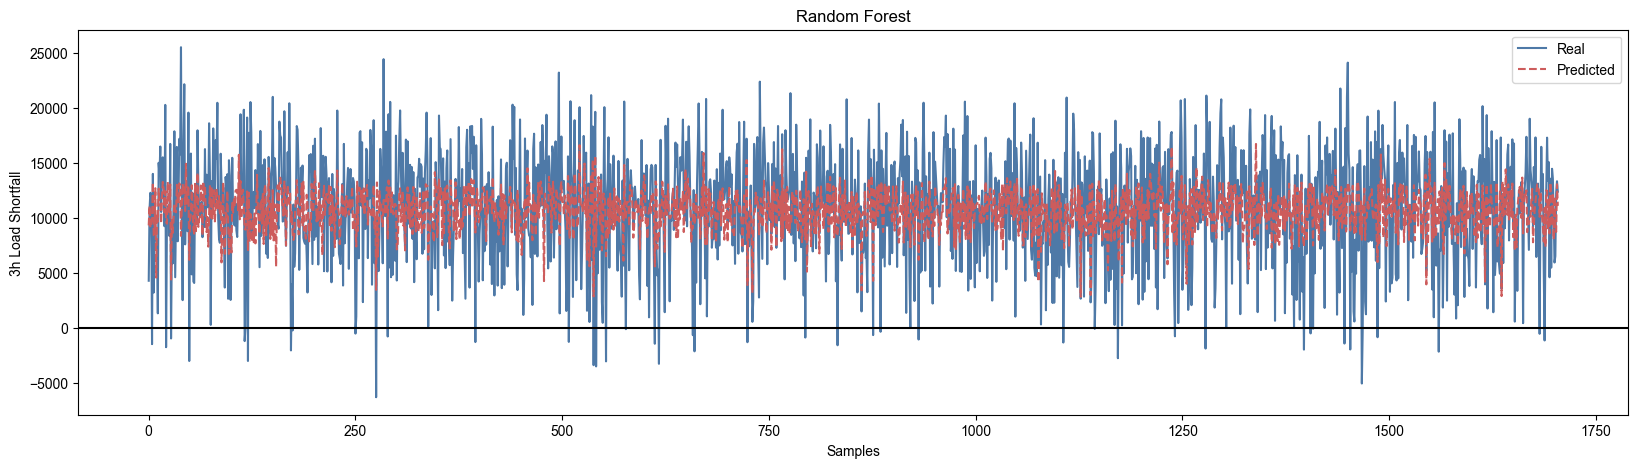

In [178]:
comparisson(y_test, Y_test_RF, 'Random Forest')

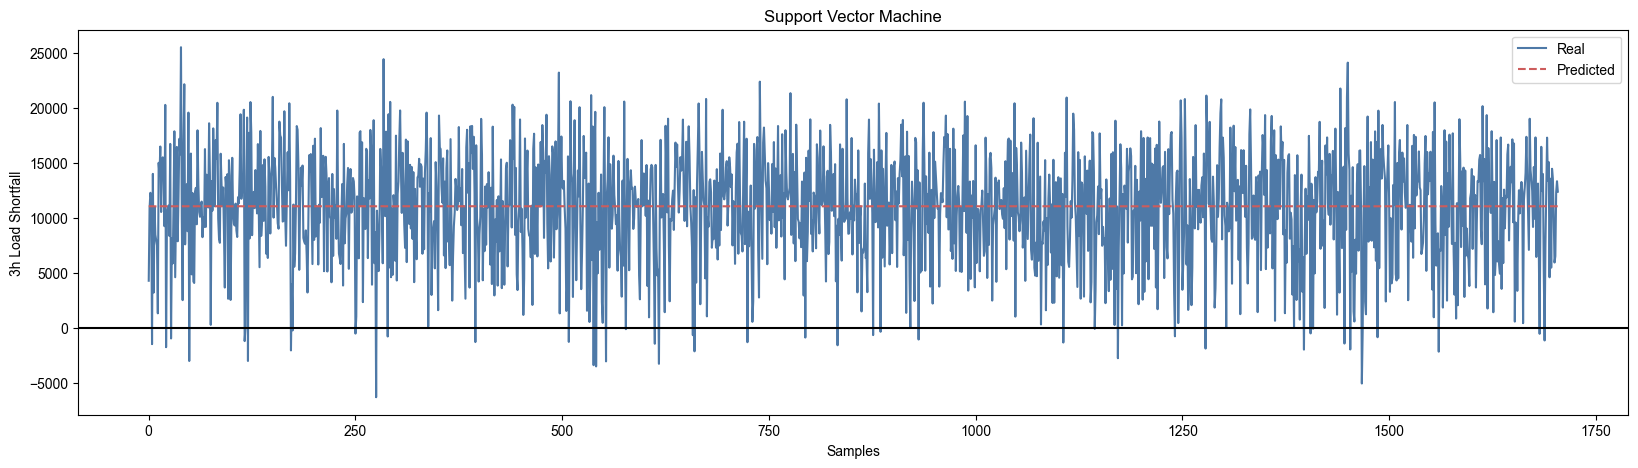

In [179]:
comparisson(y_test, Y_test_svr, 'Support Vector Machine')

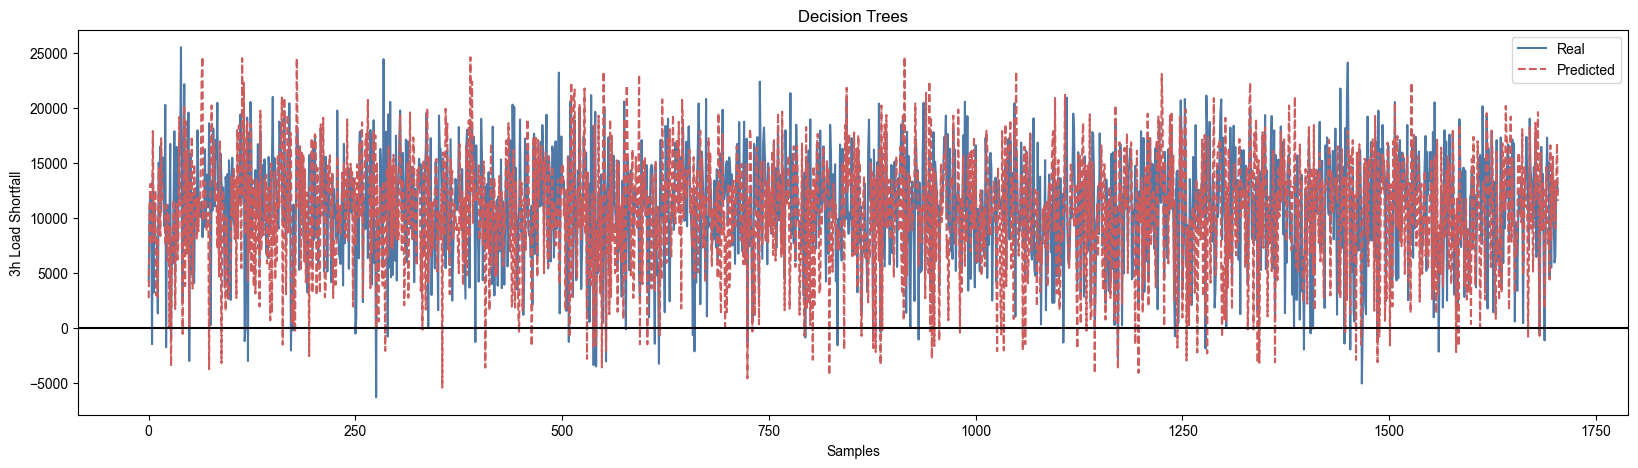

In [180]:
comparisson(y_test, Y_test_DT, 'Decision Trees')

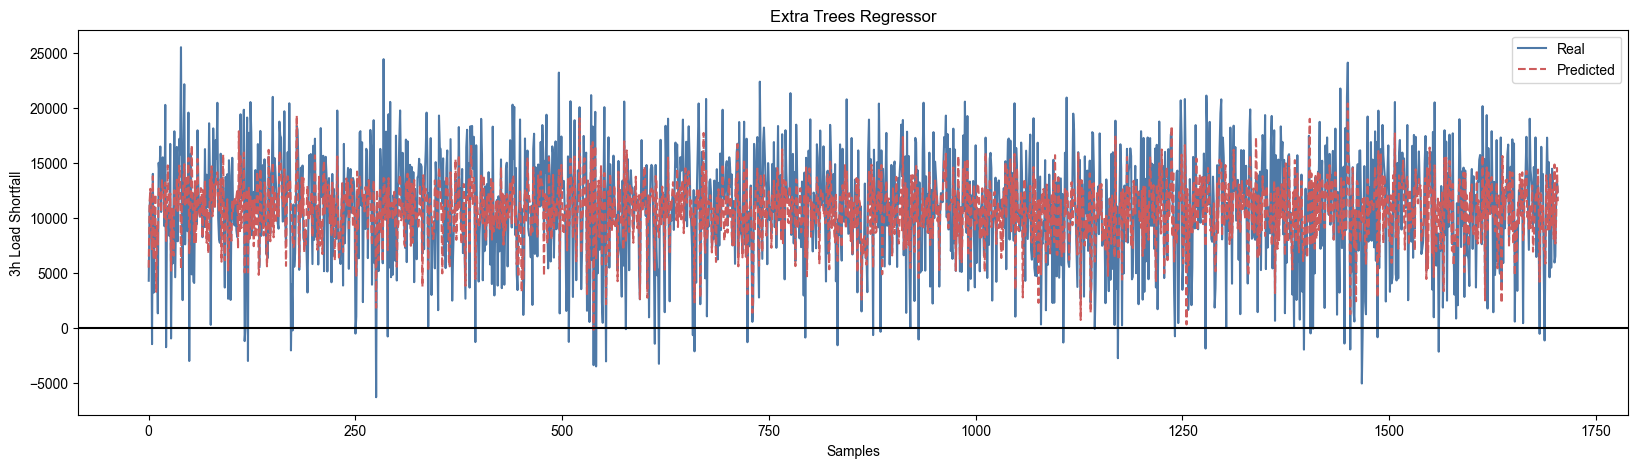

In [181]:
comparisson(y_test, Y_test_EXTR, 'Extra Trees Regressor')

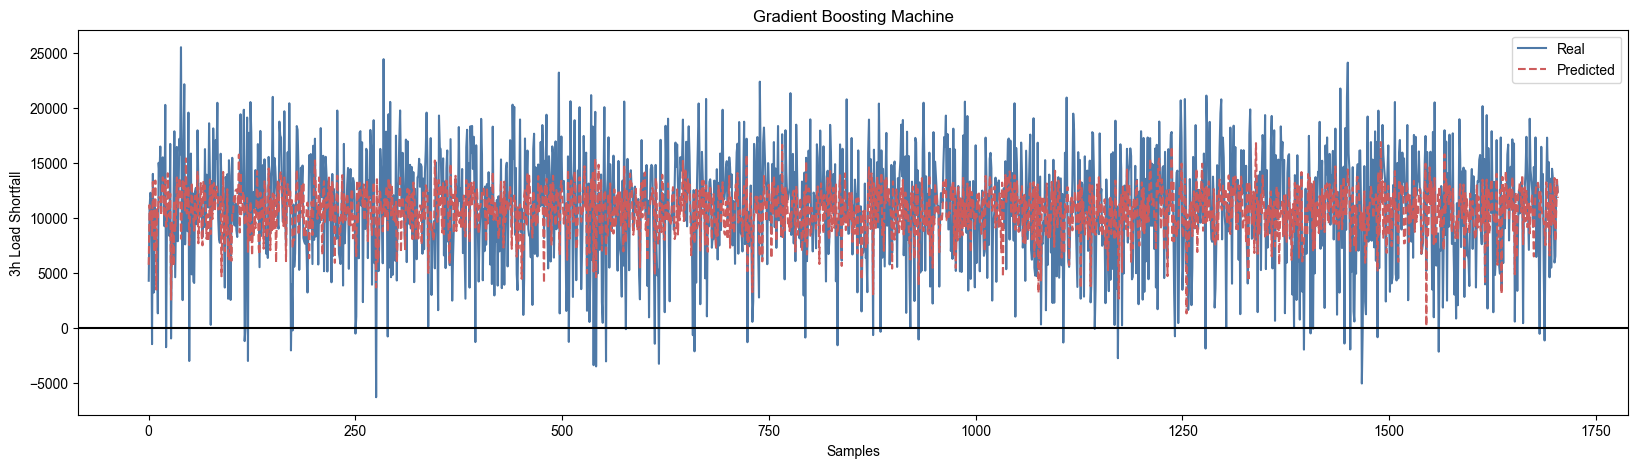

In [182]:
comparisson(y_test, Y_test_GBMR, 'Gradient Boosting Machine')

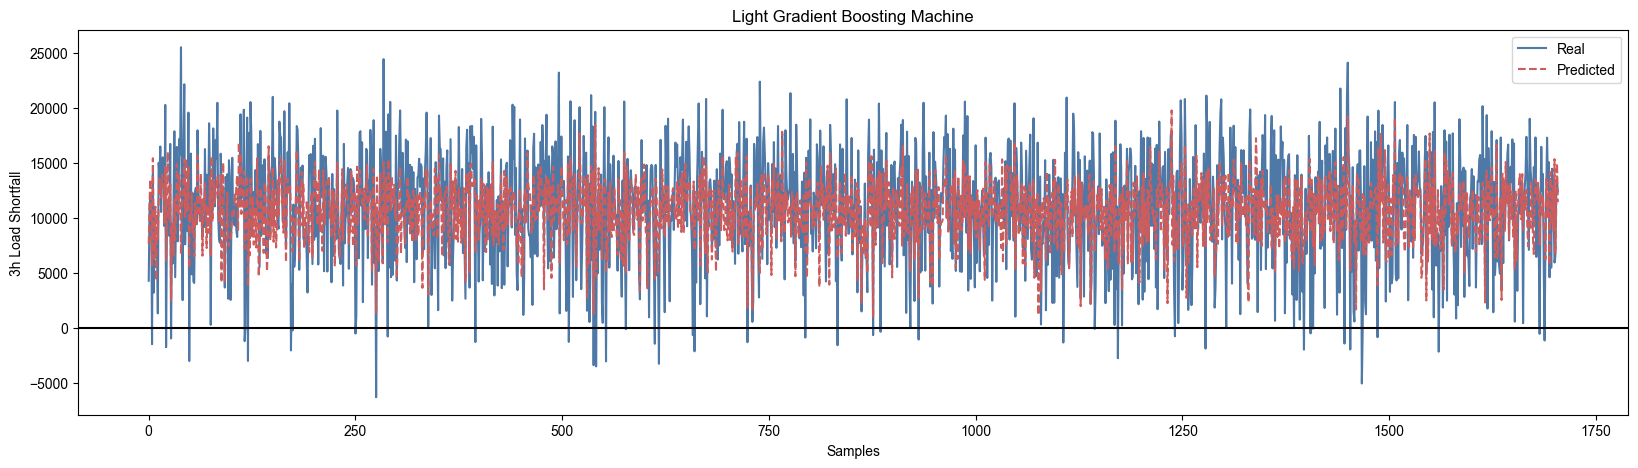

In [183]:
comparisson(y_test, Y_test_LGBMR, 'Light Gradient Boosting Machine')

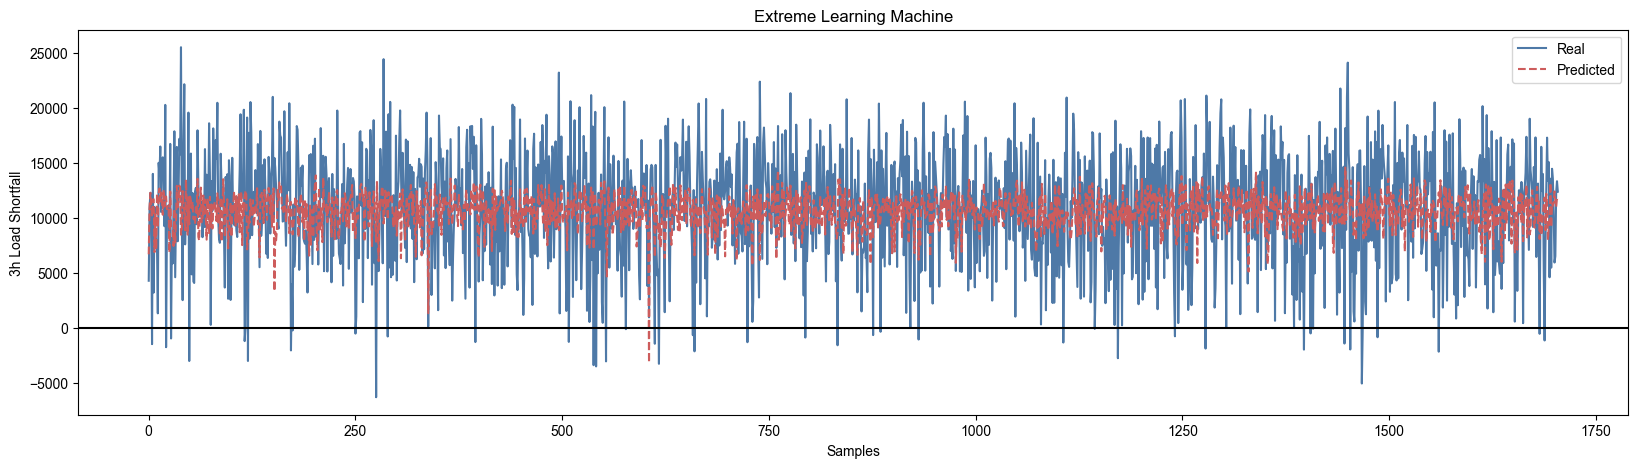

In [184]:
comparisson(y_test, Y_test_ELM, 'Extreme Learning Machine')

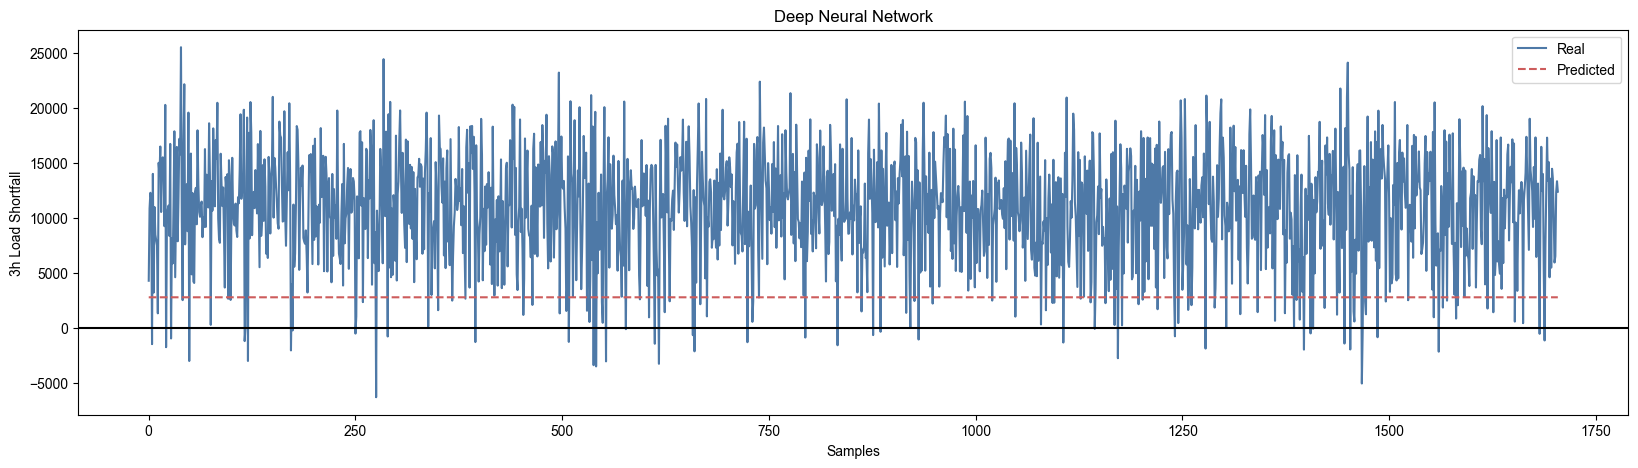

In [185]:
comparisson(y_test, Y_test_DNN, 'Deep Neural Network')

# 6. Apilando los mejores modelos

## 6.1 Stacking Regressor

In [186]:
#Esta fue la primera combinación de modelos
#Estimador 1
estimador_1     = RF 
#Estimador 2
estimador_2     = EXTR
#Estimador final
estimador_final = LGBMR

In [187]:
# # Esta es la amejor combinación de los modelos, tener en cuenta.
# #Estimador 1
# estimador_1     = EXTR
# #Estimador 2
# estimador_2     = LGBMR
# #Estimador final
# estimador_final = RF

In [188]:
#Array con los estimadores 1 y 2
estimators = [('Estm 1', estimador_1), ('Estm 2', estimador_2)]

In [189]:
SCR = StackingRegressor(estimators, final_estimator = estimador_final, n_jobs = -1)

In [190]:
# Entrenamiento del modelo Deep Neural Network
SCR.fit(X_train, y_train.ravel())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 6816, number of used features: 2
[LightGBM] [Info] Start training from score 10590.966859


StackingRegressor(estimators=[('Estm 1',
                               RandomForestRegressor(criterion='friedman_mse',
                                                     max_depth=5, n_jobs=-1,
                                                     random_state=1234)),
                              ('Estm 2',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=1234))],
                  final_estimator=LGBMRegressor(n_jobs=-1, random_state=1234),
                  n_jobs=-1)

In [191]:
# Error de test del modelo Deep Neural Network
Y_test_SCR = SCR.predict(X_test)
results['Stacking Regressor'] = scorer(y_test,Y_test_SCR,'Stacking Regressor')

El error MSE de test para el Stacking Regressor es: 16093194.379387062
El error RMSE de test para el Stacking Regressor es: 4011.632383380494
El error MAE de test para el Stacking Regressor es: 3114.971695294942
El error MedAE de test para el Stacking Regressor es: 2541.9633646501643
El error MAPE de test para el Stacking Regressor es: 2.4243036709644263
El error R2 de test para el Stacking Regressor es: 0.3637057501749521


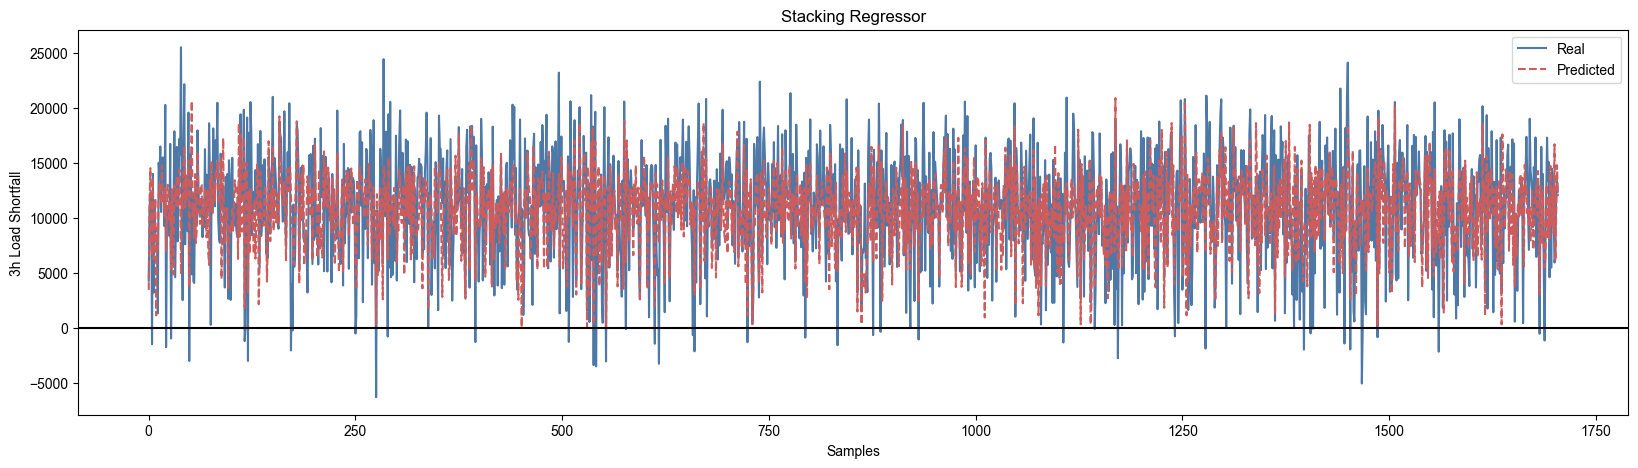

In [192]:
comparisson(y_test, Y_test_SCR, 'Stacking Regressor')

## 6.2 Actualizando la tabla de resultados

In [193]:
results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "model"})
results_df

,model,MSE,RMSE,MAE,MedAE,MAPE,R2
0,Random Forest,1.987144e+07,4457.738931,3551.485612,3036.665896,2.805085,0.214321
1,Support Vector Machine,2.529403e+07,5029.316619,4008.983648,3401.001690,3.445943,-0.000078
2,Decision Trees,3.304820e+07,5748.756640,4371.879174,3327.333333,3.025171,-0.306663
3,Extra Trees Regressor,1.532440e+07,3914.639217,3062.789666,2546.073333,2.384341,0.394102
4,Gradient Boosting Machine,1.888099e+07,4345.226378,3438.001010,2884.499336,2.513944,0.253482
5,Light Gradient Boosting Machine,1.654406e+07,4067.438777,3196.051094,2583.945132,1.997599,0.345879
6,Extreme Learning Machine,2.305671e+07,4801.740795,3835.764683,3265.427903,3.052742,0.088381
7,Deep Neural Network,9.199311e+07,9591.303713,8501.419470,8542.747233,1.431847,-2.637232
8,Stacking Regressor,1.609319e+07,4011.632383,3114.971695,2541.963365,2.424304,0.363706


In [194]:
results_df.sort_values(['MAE'],ascending=True)

,model,MSE,RMSE,MAE,MedAE,MAPE,R2
3,Extra Trees Regressor,1.532440e+07,3914.639217,3062.789666,2546.073333,2.384341,0.394102
8,Stacking Regressor,1.609319e+07,4011.632383,3114.971695,2541.963365,2.424304,0.363706
5,Light Gradient Boosting Machine,1.654406e+07,4067.438777,3196.051094,2583.945132,1.997599,0.345879
4,Gradient Boosting Machine,1.888099e+07,4345.226378,3438.001010,2884.499336,2.513944,0.253482
0,Random Forest,1.987144e+07,4457.738931,3551.485612,3036.665896,2.805085,0.214321
6,Extreme Learning Machine,2.305671e+07,4801.740795,3835.764683,3265.427903,3.052742,0.088381
1,Support Vector Machine,2.529403e+07,5029.316619,4008.983648,3401.001690,3.445943,-0.000078
2,Decision Trees,3.304820e+07,5748.756640,4371.879174,3327.333333,3.025171,-0.306663
7,Deep Neural Network,9.199311e+07,9591.303713,8501.419470,8542.747233,1.431847,-2.637232
